## In modern T20 cricket, especially in high-stakes tournaments like the IPL, understanding a batter’s intent is as important as analyzing their strike rate or total runs. Batting intent reflects how aggressively a player approaches different phases of the game.

## Batting Intent Analysis: Measure how aggressively each batter plays in different match phases.
## Momentum Shift Detection: Analyze how scoring slows down or picks up after a wicket falls.
## Bowler vs Batter Matchups: Identify which bowlers consistently dominate or get dominated by certain batters.
## Player Performance Profiling: Build detailed radar charts to visualize a batter’s strengths and weaknesses.
## Strategy Optimization: Recommend the best batting order and ideal bowler usage based on performance patterns.

In [3]:
#Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from math import pi,ceil

In [5]:
df=pd.read_csv('ipl_2025_deliveries.csv')#loading dataset
df.head()

,match_id,season,phase,match_no,date,venue,batting_team,bowling_team,innings,over,...,bowler,runs_of_bat,extras,wide,legbyes,byes,noballs,wicket_type,player_dismissed,fielder
0,202501,2025,Group Stage,1,"Mar 22, 2025","Eden Gardens, Kolkata",KKR,RCB,1,0.1,...,Hazlewood,0,0,0,0,0,0,NaN,NaN,NaN
1,202501,2025,Group Stage,1,"Mar 22, 2025","Eden Gardens, Kolkata",KKR,RCB,1,0.2,...,Hazlewood,4,0,0,0,0,0,NaN,NaN,NaN
2,202501,2025,Group Stage,1,"Mar 22, 2025","Eden Gardens, Kolkata",KKR,RCB,1,0.3,...,Hazlewood,0,0,0,0,0,0,NaN,NaN,NaN
3,202501,2025,Group Stage,1,"Mar 22, 2025","Eden Gardens, Kolkata",KKR,RCB,1,0.4,...,Hazlewood,0,0,0,0,0,0,NaN,NaN,NaN
4,202501,2025,Group Stage,1,"Mar 22, 2025","Eden Gardens, Kolkata",KKR,RCB,1,0.5,...,Hazlewood,0,0,0,0,0,0,caught,de Kock,Jitesh Sharma


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10799 entries, 0 to 10798
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   match_id          10799 non-null  int64  
 1   season            10799 non-null  int64  
 2   phase             10799 non-null  object 
 3   match_no          10799 non-null  int64  
 4   date              10799 non-null  object 
 5   venue             10799 non-null  object 
 6   batting_team      10799 non-null  object 
 7   bowling_team      10799 non-null  object 
 8   innings           10799 non-null  int64  
 9   over              10799 non-null  float64
 10  striker           10799 non-null  object 
 11  bowler            10799 non-null  object 
 12  runs_of_bat       10799 non-null  int64  
 13  extras            10799 non-null  int64  
 14  wide              10799 non-null  int64  
 15  legbyes           10799 non-null  int64  
 16  byes              10799 non-null  int64 

In [9]:
#creating copy of dataset
df_copy=df

In [13]:
#Match-No 46 (DC vs RCB)
df_copy=df.loc[df['match_no']==46]

In [21]:
#removing unnecessary columns
df_copy=df_copy.iloc[:,6:]

In [26]:
#renaming columns as per conveinence
df_copy.rename(columns={'batting_team':'team','striker':'batter'},inplace=True)

In [28]:
#Creating total_runs scored on a ball by adding extras and runs_of_bat
df_copy['total_runs']=df['runs_of_bat']+df['wide']+df['legbyes']+df['byes']+df['noballs']

In [61]:
#applying floor function on overs 
df_copy['over']=df['over'].apply(np.floor)
print(df_copy)

      team  over         batter        bowler  runs_of_bat  extras  wide  \
10561   DC   0.0  Abishek Porel   Bhuvneshwar            4       0     0   
10562   DC   0.0  Abishek Porel   Bhuvneshwar            1       0     0   
10563   DC   0.0     du Plessis   Bhuvneshwar            0       0     0   
10564   DC   0.0     du Plessis   Bhuvneshwar            1       0     0   
10565   DC   0.0  Abishek Porel   Bhuvneshwar            1       0     0   
...    ...   ...            ...           ...          ...     ...   ...   
10794  RCB  17.0      Tim David      Chameera            1       0     0   
10795  RCB  18.0      Tim David  Mukesh Kumar            6       0     0   
10796  RCB  18.0      Tim David  Mukesh Kumar            4       1     0   
10797  RCB  18.0      Tim David  Mukesh Kumar            4       0     0   
10798  RCB  18.0      Tim David  Mukesh Kumar            4       0     0   

       legbyes  byes  noballs wicket_type player_dismissed fielder  \
10561        0   

In [73]:
#creating phases on the basis of overs
conditions = [
    (df_copy['over'] <= 6),#0-6 PowerPlay
    (df_copy['over'] <= 15),#7-15 Middle_Overs
    (df_copy['over'] > 15)#16-20 Death Overs
]

choices = ['PowerPlay', 'Middle_Overs', 'Death_Overs']

df_copy['Phase'] = np.select(conditions, choices)

print(df_copy)

      team  over         batter        bowler  runs_of_bat  extras  wide  \
10561   DC   0.0  Abishek Porel   Bhuvneshwar            4       0     0   
10562   DC   0.0  Abishek Porel   Bhuvneshwar            1       0     0   
10563   DC   0.0     du Plessis   Bhuvneshwar            0       0     0   
10564   DC   0.0     du Plessis   Bhuvneshwar            1       0     0   
10565   DC   0.0  Abishek Porel   Bhuvneshwar            1       0     0   
...    ...   ...            ...           ...          ...     ...   ...   
10794  RCB  17.0      Tim David      Chameera            1       0     0   
10795  RCB  18.0      Tim David  Mukesh Kumar            6       0     0   
10796  RCB  18.0      Tim David  Mukesh Kumar            4       1     0   
10797  RCB  18.0      Tim David  Mukesh Kumar            4       0     0   
10798  RCB  18.0      Tim David  Mukesh Kumar            4       0     0   

       legbyes  byes  noballs wicket_type player_dismissed fielder  \
10561        0   

In [74]:
#Defining Batting Intent dataframe 
#by grouping Batters PhaseWise Runs and balls faced
batting_intent = (
    df_copy.groupby(['batter', 'Phase'])
    .agg(balls_faced=('runs_of_bat', 'count'),
         total_runs=('runs_of_bat', 'sum'))
    .reset_index()
)

In [75]:
batting_intent

,batter,Phase,balls_faced,total_runs
0,Abishek Porel,PowerPlay,11,28
1,Ashutosh Sharma,Death_Overs,3,2
2,Axar,Middle_Overs,13,15
3,Chameera,Death_Overs,1,0
4,Jacob Bethell,PowerPlay,6,12
5,Karun Nair,PowerPlay,4,4
6,Kohli,Death_Overs,4,2
7,Kohli,Middle_Overs,25,30
8,Kohli,PowerPlay,18,19
9,Krunal Pandya,Death_Overs,8,17


In [79]:
#creating strike rate column Strike_Rate=(Runs Scored/Balls faced)*100
batting_intent['strike_rate'] = (batting_intent['total_runs'] / batting_intent['balls_faced']) * 100

C:\Users\swaya\AppData\Local\Temp\ipykernel_10688\3618796405.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [80]:
#Minimum balls faced >5
batting_intent = batting_intent[batting_intent['balls_faced'] >= 5]
#sorting by phase for each batter
batting_intent.sort_values(by=['batter', 'Phase'], inplace=True)

In [81]:
batting_intent

,batter,Phase,balls_faced,total_runs,strike_rate
0,Abishek Porel,PowerPlay,11,28,254.545455
2,Axar,Middle_Overs,13,15,115.384615
4,Jacob Bethell,PowerPlay,6,12,200.000000
7,Kohli,Middle_Overs,25,30,120.000000
8,Kohli,PowerPlay,18,19,105.555556
9,Krunal Pandya,Death_Overs,8,17,212.500000
10,Krunal Pandya,Middle_Overs,30,47,156.666667
11,Krunal Pandya,PowerPlay,11,9,81.818182
14,Rahul,Middle_Overs,28,34,121.428571
15,Rahul,PowerPlay,10,7,70.000000


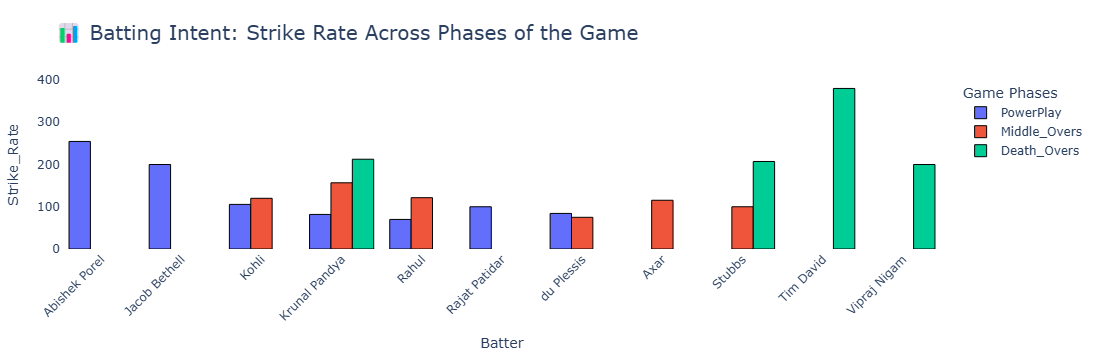

In [82]:
#Creating Graphs for Batsman Strike Rate Across the Phases
fig=px.bar(batting_intent,color='Phase',barmode='group',x='batter',y='strike_rate',
          title='📊 Batting Intent: Strike Rate Across Phases of the Game',
          labels={'strike_rate': 'Strike_Rate', 'batter': 'Batter'},
          hover_data={
        'balls_faced': True,
        'total_runs': True,
        'strike_rate': ':.2f',
        'Phase': True
    })
fig.update_layout(xaxis_tickangle=-45,title_font_size=20,
                 legend_title='Game Phases',plot_bgcolor='white',
                 bargap=0.2,margin=dict(l=40,r=40,t=80,b=100))

fig.update_traces(marker_line_width=1,marker_line_color='black')
fig.show()

Abhishek Porel showcased aggressive intent in the PowerPlay overs with a strike of 254.54.Whereas Tristan Stubbs played a crucial part in setting up a competitive total striking over 200 at the death overs.
Tim David finished the match with his high-impact powerhitting scoring 19 runs of 5 balls with strike rate of 380.Krunal Pandya shifted his gears at the death with strike rate over 200 playing a match winning innings.

In [83]:
team_phase_intent=(df_copy.groupby(['team','Phase'])
                  .agg(balls_faced=('runs_of_bat','count'),
                      total_runs=('runs_of_bat','sum'))
                  .reset_index())

In [84]:
team_phase_intent['strike_rate']=(team_phase_intent['total_runs']/team_phase_intent['balls_faced'])*100

In [85]:
team_phase_intent

,team,Phase,balls_faced,total_runs,strike_rate
0,DC,Death_Overs,25,43,172.000000
1,DC,Middle_Overs,54,60,111.111111
2,DC,PowerPlay,44,55,125.000000
3,RCB,Death_Overs,17,38,223.529412
4,RCB,Middle_Overs,55,77,140.000000
5,RCB,PowerPlay,43,46,106.976744


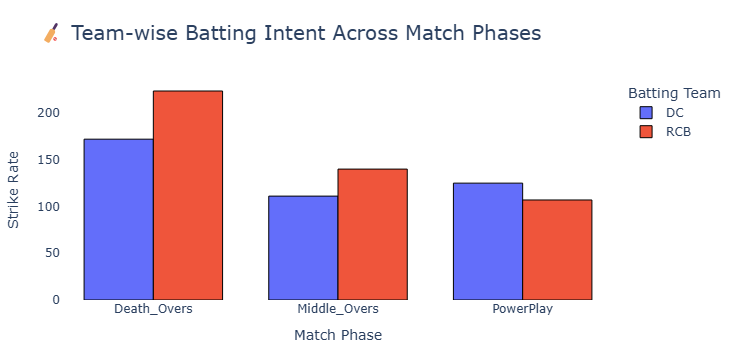

In [86]:
#Plotting teamwise batting intent across match phases
fig=px.bar(team_phase_intent,x='Phase',y='strike_rate',color='team',
          barmode='group',title='🏏 Team-wise Batting Intent Across Match Phases',
          labels={'Phase':'Match_Phase',
                 'strike_rate':'Strike_Rate',
                 'team':'Team'},
          hover_data={
              'balls_faced':True,
              'team':True,
              'strike_rate':':.2f'
          })
fig.update_layout(
    xaxis_title='Match Phase',
    yaxis_title='Strike Rate',
    title_font_size=20,
    legend_title_text='Batting Team',
    bargap=0.25,
    plot_bgcolor='rgba(0,0,0,0)',
    paper_bgcolor='white',
    margin=dict(l=40, r=40, t=80, b=60)
)

fig.update_traces(marker_line_width=1, marker_line_color='black')

fig.show()

The graph reveals a stark contrast in batting intent between Delhi Capitals and Royal Challengers Bengaluru across different match phases. Rcb showed a clear surge in aggression during the Death Overs, registering a strike rate close to 223, significantly outpacing DC.

In contrast , DC were more aggressive in the Powerplay with a strike rate of around 125, while RCB started horremdously. Across Middle Overs, RCB again maintained a higher tempo than DC, suggesting better Patternship-building and strike-rotation strategies. Overall, RCB dominated the later stages, while DC leaned on early aggression.n.

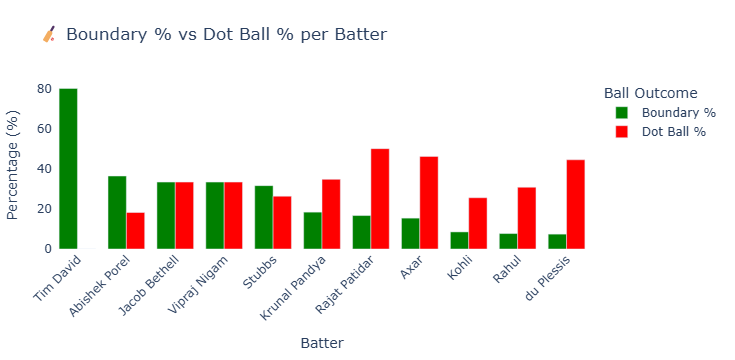

In [88]:
import plotly.graph_objects as go

#Creating Balls Outcomes column
df_copy['ball_outcome'] = df_copy['runs_of_bat'].apply(
    lambda x: 'Dot' if x == 0 else ('Boundary' if x >= 4 else 'Run')
)

batter_outcome_stats = (
    df_copy.groupby('batter')
    .ball_outcome.value_counts(normalize=True)
    .unstack()
    .fillna(0) * 100
).reset_index()

balls_faced = df_copy.groupby('batter').size().reset_index(name='balls_faced')#creating balls_faced column by Batter
batter_outcome_stats = batter_outcome_stats.merge(balls_faced, on='batter')
batter_outcome_stats = batter_outcome_stats[batter_outcome_stats['balls_faced'] >= 5]#Balls faced>5

batter_outcome_stats = batter_outcome_stats.sort_values(by='Boundary', ascending=False)

fig = go.Figure()
#Plotting Dot ball% vs Boundary% batsmanwise
fig.add_trace(go.Bar(
    x=batter_outcome_stats['batter'],
    y=batter_outcome_stats['Boundary'],
    name='Boundary %',
    marker_color='green',
    hovertemplate='%{x}<br>Boundary %: %{y:.2f}<extra></extra>'
))

fig.add_trace(go.Bar(
    x=batter_outcome_stats['batter'],
    y=batter_outcome_stats['Dot'],
    name='Dot Ball %',
    marker_color='red',
    hovertemplate='%{x}<br>Dot Ball %: %{y:.2f}<extra></extra>'
))

fig.update_layout(
    title='🏏 Boundary % vs Dot Ball % per Batter',
    xaxis_title='Batter',
    yaxis_title='Percentage (%)',
    barmode='group',
    bargap=0.25,
    plot_bgcolor='rgba(0,0,0,0)',
    paper_bgcolor='white',
    legend_title_text='Ball Outcome',
    xaxis_tickangle=-45,
    margin=dict(l=40, r=40, t=80, b=100)
)

fig.show()

Finishers like Tim David and Tristan Stubbs have High batting % indicating aggressive approach at the death.On the contrast Batsman like Virat Kohli,KL Rahul ,Faf-du-Plessis ,Rajat Patidar showed a defensive or slow.Reflecting difficult Batting conditions and suggested the style of play was conservative and accumulative relying on rotating the strike

In [90]:
#Grouping the top 4 batsman of the match
top_batters=(
    df_copy.groupby('batter')['runs_of_bat'].sum()
    .sort_values(ascending=False)
    .head(4).index.tolist()
)

In [52]:
batters_progression = df_copy[df_copy['batter'].isin(top_batters)]#isin function to filter out top batsman
batters_overwise = (
    batters_progression.groupby(['batter', 'over'])
    .agg(runs_in_over=('runs_of_bat', 'sum'))
    .reset_index()
)

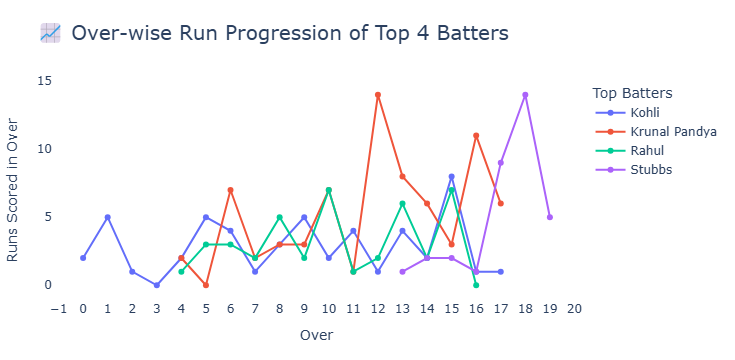

In [91]:
batters_progression = df_copy[df_copy['batter'].isin(top_batters)]#isin function to filter out top batsman
#Plotting the batsman's overwise approach 
batters_overwise = (
    batters_progression.groupby(['batter', 'over'])
    .agg(runs_in_over=('runs_of_bat', 'sum'))
    .reset_index()
)

fig = px.line(
    batters_overwise,
    x='over',
    y='runs_in_over',
    color='batter',
    markers=True,
    title='📈 Over-wise Run Progression of Top 4 Batters',
    labels={
        'over': 'Over',
        'runs_in_over': 'Runs in Over',
        'batter': 'Batter'
    },
    hover_data={
        'over': True,
        'runs_in_over': True,
        'batter': True
    }
)

fig.update_layout(
    xaxis=dict(tickmode='linear'),
    yaxis_title='Runs Scored in Over',
    legend_title='Top Batters',
    title_font_size=20,
    plot_bgcolor='rgba(0,0,0,0)',
    paper_bgcolor='white',
    margin=dict(l=40, r=40, t=80, b=60),
    hovermode='x unified'
)

fig.show()

Kl Rahul played a slowish innings scoring less than a run-up-ball,and Tristan Stubbs finished brilliantly in the death overs,Virat Kohli started slow since 3 wickets falling quickly within the powerplay and played steadily with a conservative approach.
Krunal Pandya adopted a steadier approach, gradually accelerating through the middle overs and peaking with a 14-run over around the 12th over.

In [92]:
#Correlating Batting Tempo with Wicket Falls
wickets_df=df_copy[df_copy['player_dismissed'].notna()]
#Grouping wickets and runs overwise forming an overwise analysis dataframe
wickets_by_over=wickets_df.groupby('over').size().reset_index(name='wickets')
runs_by_over=df_copy.groupby('over')['runs_of_bat'].sum().reset_index(name='total_runs')
overwise_analysis=pd.merge(runs_by_over,wickets_by_over,on='over',how='left').fillna(0)

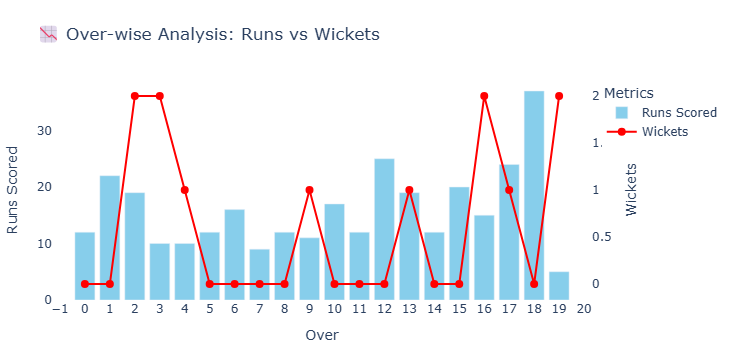

In [93]:
#overwise analysis of Runs and Wickets
fig=go.Figure()
fig.add_trace(go.Bar(x=overwise_analysis['over'],
                    y=overwise_analysis['total_runs'],
                    name='Runs Scored',
    marker_color='skyblue',
    hovertemplate='Over %{x}<br>Runs: %{y}<extra></extra>'
))
fig.add_trace(go.Scatter(
    x=overwise_analysis['over'],
    y=overwise_analysis['wickets'],
    name='Wickets',
    mode='lines+markers',
    marker=dict(color='red', size=8),
    line=dict(width=2, color='red'),
    yaxis='y2',
    hovertemplate='Over %{x}<br>Wickets: %{y}<extra></extra>'
))
fig.update_layout(
    title='📉 Over-wise Analysis: Runs vs Wickets',
    xaxis=dict(title='Over', tickmode='linear'),
    yaxis=dict(title='Runs Scored'),
    yaxis2=dict(title='Wickets', overlaying='y', side='right'),
    legend_title='Metrics',
    plot_bgcolor='rgba(0,0,0,0)',
    paper_bgcolor='white',
    margin=dict(l=40, r=40, t=80, b=60),
    hovermode='x unified'
)

fig.show()

The early overs indicate slowish and steady start, with <35 runs scored in powerplay, suggesting Pressure on the batters in the Powerplay. The middle overs (7–14) show fluctuating intent with moderate scoring and occasional wicket losses, indicating a cautious rebuild phase.

The batting side regained momentum in the death overs (15–19) with consistent scoring around 16–27 runs per over, despite losing wickets in the 16th and 18th, reflecting strong finishing intent while balancing aggression with risk.

In [66]:
#batter profiles based on Match Performance
batter_stats=(
    df_copy.groupby('batter').
    agg(balls_faced=('runs_of_bat','count'),
       total_runs=('runs_of_bat','sum'),
       dismissals=('player_dismissed',lambda x:x.notna().sum())
)
.reset_index())

In [94]:
#creating outcome count dataframe by grouping ballwise outcome
outcome_count=df_copy.groupby(['batter','ball_outcome']).size().unstack().fillna(0)

In [95]:
#creating Dot Percent outcome
outcome_count['dot_percent'] = (outcome_count['Dot'] / outcome_count.sum(axis=1)) * 100

In [96]:
#creating boundary percent 
outcome_count['boundary_percent'] = (outcome_count['Boundary'] / outcome_count.sum(axis=1)) * 100
outcome_count=outcome_count[['dot_percent','boundary_percent']].reset_index()

In [97]:
#performance profiles for each batter, including their strike rate, average, dot ball %, and boundary %
batter_profiles = pd.merge(batter_stats, outcome_count, on='batter')
#Strike rate columns
batter_profiles['strike_rate'] = (batter_profiles['total_runs'] / batter_profiles['balls_faced']) * 100
#Batting Average column using Lambda funcrion
batter_profiles['average'] = batter_profiles.apply(
    lambda row: row['total_runs'] / row['dismissals'] if row['dismissals'] > 0 else float('inf'), axis=1
)
#Balls faced >10
batter_profiles = batter_profiles[batter_profiles['balls_faced'] >= 10]

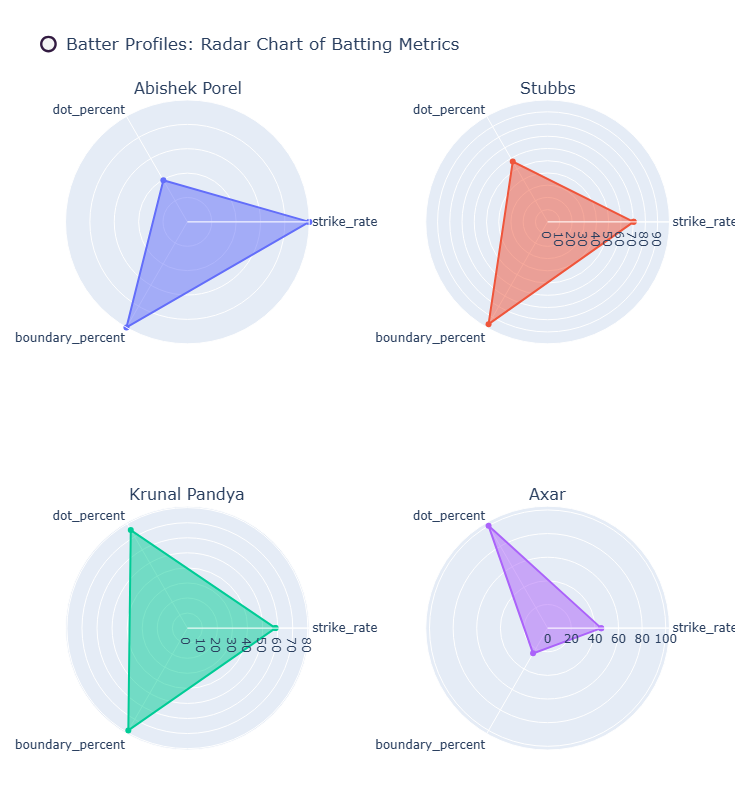

In [98]:
#plotting radar graphs for showcasing batsman Performance
from plotly.subplots import make_subplots
from math import pi, ceil

metrics = ['strike_rate', 'dot_percent', 'boundary_percent']
top_batters_radar = batter_profiles.sort_values(by='strike_rate', ascending=False).head(4).copy()
normalized_profiles = top_batters_radar[['batter'] + metrics].copy()

#looping through batter_profiles and finding Maximum of data
for metric in metrics:
    max_val = batter_profiles[metric].max()
    normalized_profiles[metric] = (normalized_profiles[metric] / max_val) * 100

normalized_profiles.reset_index(drop=True, inplace=True)

num_batters = len(normalized_profiles)
rows = ceil(num_batters / 2)
cols = 2 if num_batters > 1 else 1

#Making Subplot for each batsman Polar type
fig = make_subplots(
    rows=rows, cols=cols,
    specs=[[{'type': 'polar'}] * cols for _ in range(rows)],
    subplot_titles=normalized_profiles['batter'].tolist()
)
#looping through batter's strike rate, dot %, boundary %
for i, row in normalized_profiles.iterrows():
    r = row[metrics].tolist() + [row[metrics[0]]]#Then, add the first metric again at the end (row[metrics[0]] means the strike rate again).
    theta = metrics + [metrics[0]]
#the last point should connect back to the first point in the radar chart
    subplot_row = (i // cols) + 1
    subplot_col = (i % cols) + 1
#Add a scatterpolar chart (radar plot) to their subplot.
    fig.add_trace(
        go.Scatterpolar(
            r=r,
            theta=theta,
            fill='toself',
            name=row['batter'],
            hovertemplate='<b>%{theta}</b>: %{r:.1f}<extra></extra>'
        ),
        row=subplot_row, col=subplot_col
    )

fig.update_layout(
    title='🔘 Batter Profiles: Radar Chart of Batting Metrics',
    showlegend=False,
    height=400 * rows,
    polar=dict(
        radialaxis=dict(visible=True, range=[0, 100], showticklabels=False)
    ),
    margin=dict(l=40, r=40, t=100, b=50)
)

fig.show()

Abishek Porel and Stubbs have a good balance of high strike rate and boundary percent, with relatively moderate dot ball percentages.
Krunal Pandya and Axar show high dot percentages (meaning they play more dot balls), with Axar especially having very low boundary percent, indicating a more defensive batting style compared to the others.